# 確率分布

## 1. 離散型の確率分布

### 例 1.1 (ベルヌーイ分布)

　**ベルヌーイ分布** (Bernoulli distribution) コインの裏表のように2種類の可能な結果 (成功を S, 失敗を F) を生じる試行 (**ベルヌーイ試行** (Bernoulli trials) と言う) に対する確率分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　成功 S が起きる確率を $p$ とした場合, 確率変数 $X$ について成功 S の時に $X=1$, 失敗 F の時に $X = 0$ とする. この時の確率質量関数は以下の通り.

$$
    f(x) = p^x(1-p)^{1-x}
$$

</div>

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = p \\
        & {\rm Var}(X) = p(1-p)
    \end{align}
$$

</div>

#### 関連Pythonモジュール

　[`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) を用いて生成する.

ベルヌーイ分布・擬似乱数
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0]

ベルヌーイ分布・期待値/分散
期待値(乱数 vs 真値): 0.30029 vs 0.3
分散(乱数 vs 真値): 0.21011591590000003 vs 0.21

ベルヌーイ分布


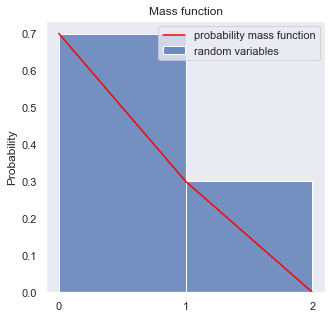

In [5]:
%matplotlib inline

from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.3 のベルヌーイ分布に従った疑似乱数を size = 100000 だけ生成する.
p = 0.3
size = 100000
rvs = bernoulli.rvs(p=p, size=size)

print("=========================================")
print("ベルヌーイ分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = bernoulli.mean(p=p)
var_true = bernoulli.var(p=p)

print("")
print("=========================================")
print("ベルヌーイ分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("ベルヌーイ分布")
print("======================================")

# 理想PMF
x = np.arange(0, 3, 1)
y = bernoulli.pmf(k=x, p=p)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース

　単独で使用することはあまりないが, 統計モデルの一部にベルヌーイ分布を仮定することが多い. 現象が2パターンしか取り得ないような「会員登録の実施有無」, 「レビュー記事に対して高評価をするかしないか」, 「購買行動を行うか否か」にベルヌーイ分布を仮定する.
 
- 商品レビューが有用かどうか ([柴田と伊東, 2019](https://www.jstage.jst.go.jp/article/jsaikbs/118/0/118_05/_pdf). この論文内ではベルヌーイ分布による評価の代替評価を提案している.)
- ECサイト利用者に対して施策を売った際にどういったセグメントグループに効果的に機能したかを推定するモデル内において, セグメントグループの購買有無に対してベルヌーイ分布を仮定 ([松嵜ら, 2017](https://ipsj.ixsq.nii.ac.jp/ej/?action=repository_action_common_download&item_id=185104&item_no=1&attribute_id=1&file_no=1))

### 例 1.2 (二項分布)

　**二項分布** (binomial distribution) は結果が 2 つの試行 (成功を S, 失敗を F) を何度も繰り返すことによって起こる確率分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　S が 確率 $p (0 \leq p \leq 1)$ で $x$ 回, F が確率 $1-p$ で $n-x$ 回生じるとすると, $x=0,1, \cdots, n$ であって, その確率質量関数は以下の通り.

$$
    f(x) = {}_n{\rm C}_{x} p^x (1-p)^{n-x}
$$

</div>

確率変数 $X$ が 二項分布に従っていることを $X \sim Bi(n, p)$ と記載する.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = np \\
        & {\rm Var}(X) = np(1-p)
    \end{align}
$$

</div>

#### 関連Pythonモジュール

　[`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) を用いて生成する.

二項分布・擬似乱数
[1 2 0 2 1 1 5 3 4 1 2 4 4 1 0 3 3 4 2 2 3 4 1 4 5 4 4 1 4 4 1 2 5 3 3 2 2
 4 3 4 0 3 5 2 4 6 2 3 2 3 3 2 4 2 2 8 1 3 1 4 1 2 1 4 2 2 3 4 2 2 3 4 1 4
 6 0 5 1 4 3 3 1 4 8 4 5 4 1 5 5 3 2 3 1 5 3 4 3 5 4]

二項分布・期待値/分散
期待値(乱数 vs 真値): 2.99594 vs 3.0
分散(乱数 vs 真値): 2.0879035164 vs 2.0999999999999996

二項分布


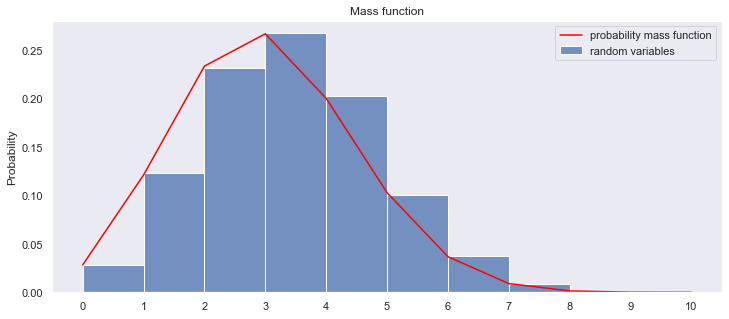

In [6]:
%matplotlib inline

from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 試行回数 n = 10, 成功確率 p = 0.3 の二項分布に従った疑似乱数を size = 100000 だけ生成する.
n = 10
p = 0.3
size = 100000
rvs = binom.rvs(n=n, p=p, size=size)

print("=========================================")
print("二項分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = binom.mean(n=n, p=p)
var_true = binom.var(n=n, p=p)

print("")
print("=========================================")
print("二項分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("二項分布")
print("======================================")

# 理想PMF
x = np.arange(0, 11, 1)
y = binom.pmf(k=x, n=n, p=p)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース
 
- バナー広告のインプレッション数 $n$ 回のうち, クリック率 $p$ で広告がクリックされる回数 ([本橋ら, 2012](http://www.orsj.or.jp/archive2/or57-10/or57_10_574.pdf))
- 特定のサービスにおいて $n$ 人の利用ユーザーのうち, 確率 $p$ で解約する人数
- 特定の病気において $n$ 人の被験者のうち, 病気の発症率 $p$ がどのように変わるか

### 例 1.3 (ポアソン分布)

　**ポアソン分布** (Poisson distribution) とは, 二項分布において $n$ が大 (すなわち大量の観測) である一方, $p$ が小 (すなわち希少現象) である分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$\lambda > 0, x \geq 0$ として確率質量関数は以下の通り.

$$
    f(x) = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

</div>

　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また, $e^x$ について[マクローリン展開](https://ja.wikipedia.org/wiki/テイラー展開)から

$$
    \begin{align}
        e^x &= 1 + \frac{x}{1!} + \frac{x^2}{2!} + \cdots + \frac{x^k}{k!} + \cdots \\
            &= \sum_{k=0}^{\infty}{\frac{x^k}{k!}}
    \end{align}
$$

と書けるので,

$$
\sum_{x=0}^{\infty}{f(x)} = \sum_{x=0}^{\infty}{\frac{e^{-\lambda} \lambda^{x}}{x!}} = e^{-\lambda} \sum_{x=0}^{\infty}{\frac{ \lambda^{x}}{x!}} = e^{-\lambda} \cdot e^{\lambda} = 1
$$

と分かる.  

　確率変数 $X$ がポアソン分布に従う時, $X \sim Po(\lambda)$ または $X \sim Poisson(\lambda)$ と記載する.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
$$
    \begin{align}
        & {\rm E}(X) = \lambda \\
        & {\rm Var}(X) = \lambda
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                   &= \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                   &= \lambda e^{-\lambda} \cdot e^{\lambda} \\
                   &= \lambda
    \end{align}
$$

と計算できる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めることで分散も求められる.

$$
    \begin{align}
        {\rm E}(X^2) &= \sum_{x=0}^{\infty}{x^2\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \sum_{x=0}^{\infty}{\{x(x-1) + x\} \frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \lambda^2 e^{-\lambda}\sum_{x=2}^{\infty}{\frac{\lambda^{x-2}}{(x-2)!}} + \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                     &= \lambda^2 + \lambda \\
    \end{align}
$$

よって

$$
    {\rm Var}(X) = {\rm}E(X^2) - ({\rm E}(X))^2 = \lambda^2 + \lambda - \lambda^2 = \lambda
$$

#### 関連Pythonモジュール

　[`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) を用いて生成する.

ポアソン分布・擬似乱数
[2 2 1 0 2 0 2 5 1 2 3 1 1 1 0 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 0 2 1 0 0 2
 2 0 2 0 0 0 1 0 1 2 1 2 1 3 1 1 1 1 0 1 1 1 0 0 0 2 1 2 1 1 1 0 0 1 2 2 2
 0 1 0 0 0 0 2 0 0 2 1 2 3 3 2 2 0 0 0 1 2 1 0 2 1 0]

ポアソン分布・期待値/分散
期待値(乱数 vs 真値): 1.00269 vs 1.0
分散(乱数 vs 真値): 1.0003427639 vs 1.0

ポアソン分布


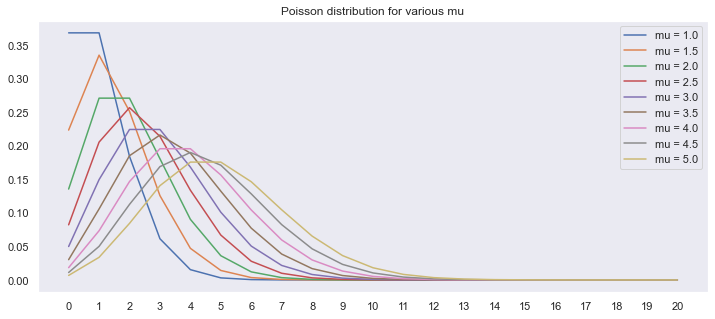

In [7]:
%matplotlib inline

from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# mu (上式のlambdaに相当) = 1 のポアソン分布に従った疑似乱数を size = 100000 だけ生成する.
mu = 1
size = 100000
rvs = poisson.rvs(mu=mu, size=size)

print("=========================================")
print("ポアソン分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)

# 期待値・分散の理論値
exp_true = poisson.mean(mu=mu)
var_true = poisson.var(mu=mu)

print("")
print("=========================================")
print("ポアソン分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

# 可視化
print("")
print("======================================")
print("ポアソン分布")
print("======================================")

# x軸
x = np.arange(0, 21, 1)

# 図の定義
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

for mu in np.arange(1.0, 5.5, 0.5):
    y = poisson.pmf(k=x, mu=mu)
    label = f"mu = {mu}"
    ax1.plot(x, y, label=label)
    
ax1.set_xticks(x)
ax1.set_title("Poisson distribution for various mu")
ax1.legend()
ax1.grid()

　二項分布において $n \rightarrow \infty, p \rightarrow 0$ とすることでポアソン分布に近づく. ここで $\lambda = np$ とすれば確率質量関数 $f(x)$ は

$$
    \begin{align}
        f(x) &= {}_n{\rm C}_{x} \Bigl( \frac{\lambda}{n} \Bigr)^x \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{n-x} \\
             &= \frac{n(n-1) \cdots (n-x+1)}{x!} \frac{\lambda^x}{n^x} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x} \\
             &= \frac{\lambda^x}{x!} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{1}{n} \Bigr) \Bigl( 1 - \frac{2}{n} \Bigr) \cdots \Bigl( 1 - \frac{k-1}{n} \Bigr) \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}
    \end{align}
$$

ここで, $n \rightarrow \infty$ とした時, $m = 1, 2, \cdots, k-1$ とすれば

$$
\lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{m}{n} \Bigr)} = 0, \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}} = 0 \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^n} = e^{-\lambda}
$$

なので,

$$
    \lim_{n \rightarrow \infty}{f(x)} = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

とポアソン分布になる. 実際に python で二項分布とポアソン分布を比較する.

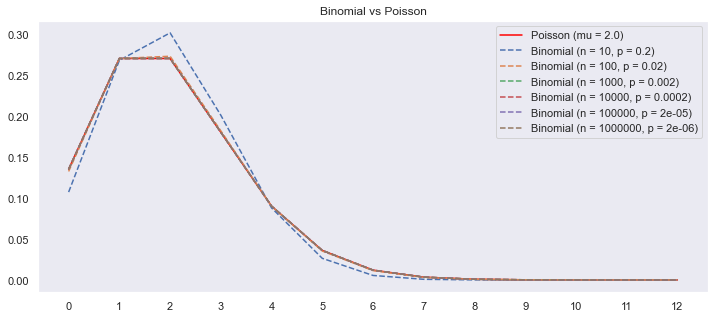

In [8]:
%matplotlib inline

from scipy.stats import binom, poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# x軸
x = np.arange(0, 13, 1)

# 図の定義
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

# ポアソン分布
y = poisson.pmf(k=x, mu=2.0)
label = f"Poisson (mu = 2.0)"
ax1.plot(x, y, color="red", label=label)

# 二項分布
scales = np.array([1, 10, 100, 1000, 10000, 100000])
base_n = 10
base_p = 0.2
for scale in scales:
    n = base_n * scale
    p = base_p / scale
    y = binom.pmf(k=x, n=n, p=p)
    label = f"Binomial (n = {n}, p = {p})"
    ax1.plot(x, y, linestyle="dashed", label=label)
    
ax1.set_xticks(x)
ax1.set_title("Binomial vs Poisson")
ax1.legend()
ax1.grid()

#### ユースケース

- 交通事故件数
- 大量生産の不良品数 ([pyISC Example: Simple Anomaly Detection with Frequency Data](https://notebook.community/STREAM3/pyisc/docs/pyISC_simple_anomaly_example))
- 破産件数
- 火災件数
- 砲弾命中数
- 遺伝子の突然変異数
- 電話の呼び数
- 渋滞していない高速道路の料金ゲートへの車の到着台数
- 医学研究において顕微鏡視野に入る区画当たりのバクテリア数
- 物理現象として単位時間当たりのガイガー計数管の読み数

### 例 1.4 (幾何分布)

　成功 S (発生確率 $p$) と失敗 F (発生確率 $q = 1- p$) の 2 通りしかない試行を次々と続ける試行を考える. 最初の成功 S が出現するまでの試行回数を $x$ とするならば $x = 1, 2, 3, \cdots$ であり以下の確率質量関数で表現される確率分布を**幾何分布** (geometric distribution) という.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$0 \lt p \lt 1, q = 1 - p$ とする. 

$$
    f(x) = pq^{x-1} \quad (x = 1, 2, 3, \cdots)
$$

</div>

これは $x$ に応じて幾何級数 (等比数列) 的に減じていくため幾何分布という.  
　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また, $0 \lt p \lt 1 \Rightarrow 0 \lt q \lt 1$ なので無限等比級数の和から

$$
\sum_{x=1}^{\infty}{f(x)} = p\sum_{x=1}^{\infty}{q} = p \cdot \frac{1}{1-q} = p \cdot \frac{1}{p} = 1
$$

と分かる.  

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{1}{p} \\
        & {\rm Var}(X) = \frac{q}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) = \sum_{x=1}^{\infty}{x pq^{x-1}} = p \sum_{x=1}^{\infty}{ xq^{x-1} }
    \end{align}
$$

$0 \lt q \lt 1$ において

$$
    g(q) = \sum_{x = 0}^{\infty}{q^x} = \frac{1}{1-q}
$$

を考える. 第 3 項については無限等比級数の和から分かる. $q$ について微分すると

$$
    g'(q) = \sum_{x = 1}^{\infty}{xq^{x-1}} = \frac{1}{(1-q)^2}
$$

となり $p = 1 - q$ であることに注意して,

$$
    {\rm E}(X) = p \sum_{x=1}^{\infty}{ xq^{x-1} } = p \cdot \frac{1}{(1-q)^2} = \frac{1}{p}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は[期待値の4番目の性質](expectation-property)を用いている.
　${\rm}E(X(X-1))$ を求めれば分散が求められる. 上で用いた $g(q)$ を 2 階微分すると

$$
    g''(q) = \sum_{x = 2}^{\infty}{x(x-1)q^{x-2}} = \frac{2}{(1-q)^3}
$$

なので

$$
    {\rm E}(X(X-1)) = pq \sum_{x=2}^{\infty}{ x(x-1)q^{x-2} } = pq \frac{2}{(1-q)^3} = \frac{2(1-q)}{p^2}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{2(1-q)}{p^2} + \frac{1}{p} - \frac{1}{p^2} \\
                     &= \frac{1-p}{p^2} \\
                     &= \frac{q}{p^2}
    \end{align}
$$

と分かる.

#### 関連Pythonモジュール

　[`scipy.stats.geom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom) を用いて生成する.

幾何分布・擬似乱数
[ 12  10  25   2  53  68  22   5  32  35  47   3   3  68   7  11  24 101
   5 114  26  16  10  44   5  60  13   2   1 137  11  13   4  11  44  15
  21  34  10  33  27  96  43  42  29   2   2  14   3  49  29  37  10   4
  24  84  18  39  44  10   8   7   4  20  30  10  29   2  45 100  10  18
  27  63   4  21   9  25   7  17  26  30  26  40  50  41  15  19  12   4
  56  12   2  23  10   2   2  51  88   7]

幾何分布・期待値/分散
期待値(乱数 vs 真値): 24.88497 vs 25.0
分散(乱数 vs 真値): 599.9549780991 vs 600.0
最大値 (乱数): 325
最小値 (乱数): 1

幾何分布


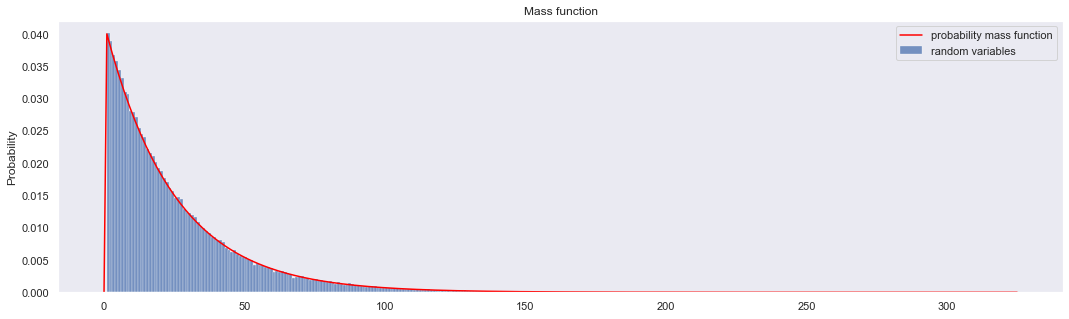

In [9]:
%matplotlib inline

from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.04 の幾何分布に従った疑似乱数を size = 100000 だけ生成する.
p = 0.04
size = 100000
rvs = geom.rvs(p=p, size=size)

print("=========================================")
print("幾何分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = geom.mean(p=p)
var_true = geom.var(p=p)

print("")
print("=========================================")
print("幾何分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("幾何分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 1, 1)

# 図の定義
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)

# 確率質量関数による真値
y = geom.pmf(k=x, p=p)
ax1.plot(x, y, color="red", label="probability mass function")

ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース
 
- 1年について確率 $p$ で起こる災害が $x$ 年以内に発生する分布として捕捉.

### 例 1.5 (負の二項分布)

　**負の二項分布** (negative binomial distribution) は幾何分布を一般化されたものであり, $n$ 回目の成功を得るまでの失敗の回数を $x$ とした時の確率分布である.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$x = 0, 1, \cdots$ とする. 

$$
    f(x) = {}_{n+x-1}{\rm C}_{x} p^n q^x
$$

</div>

$n=1$ の時に幾何分布となる. ちなみに, 二項分布で二項係数に負も認めれば負の二項分布が求められるため, この名称となっている.  
　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  

　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また確率質量関数の和が 1 となることについては, 負の二項展開式について考えるとすぐに導出できる. $n \in \mathbb{N}$, $r$ $(0 \leq r \leq n, r \in \mathbb{N})$ として

$$
    (1 + t)^{-n} = \sum_{x=0}^{n}{{}_{-n}{\rm C}_{x}t^x}
$$

とかけ,

$$
    {}_{-n}{\rm C}_{x} = (-1)^x {}_{n+x-1}{\rm C}_{x}
$$

と表せる.
　$t = -(1-p)$ として
 
$$
    \frac{1}{p^n} = {1 -(1-p)}^{-n} = \sum_{x=0}^{\infty}{{}_{-n}{\rm C}_{x}(-(1-p))^x} = \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}(1-p)^x}
$$

となるので, $q = 1 - p$ であり上式に $p^n$ をかけて

$$
    \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}p^n q^x} = 1
$$

となる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{nq}{p} \\
        & {\rm Var}(X) = \frac{nq}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{x \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-1)! } p^n q^x }
    \end{align}
$$

ここで $y = x - 1$, $N = n + 1$ と置換すると

$$
    \begin{align}
        {\rm E}(X) &= \sum_{y=0}^{\infty}{ \frac{ (y + N -1)! }{ ( N-2 )! y! } p^{ N-1 } q^{ y+1 } } \\
                   &= \frac{ q }{ p }(N-1) \sum_{y=0}^{\infty}{ \frac{ (y + N -1 )! }{ ( N-1 )! y! } p^{ N } q^{ y } } \\
                   &= \frac{ q }{ p }(N-1) \\
                   &= \frac{nq}{p}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は[期待値の4番目の性質](expectation-property)を用いている.  
　${\rm}E(X(X-1))$ を求めれば分散が求められるので,

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{x=0}^{\infty}{ x(x-1) {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                        &= \sum_{x=1}^{\infty}{ x(x-1) \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                        &= \sum_{x=2}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-2)! } p^n q^x }
    \end{align}
$$

となる. ここで $y = x - 2$, $N = n + 2$ と置換すると

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{y=0}^{\infty}{ \frac{ (N + y - 1)! }{ (N - 3)! y! } p^{N - 2} q^{y + 2} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \sum_{y=0}^{\infty}{ \frac{ (N+y-1)! }{ (N-1)! y! } p^{N} q^{y} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \\
                        &= \frac{q^2}{p^2}n(n + 1)
    \end{align}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{q^2}{p^2}n(n + 1) + \frac{nq}{p} - \frac{n^2 q^2}{p^2} \\
                     &= \frac{nq}{p^2}
    \end{align}
$$

と分かる.

#### 関連Pythonモジュール

　[`scipy.stats.nbinom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom) を用いて生成する.

負の二項分布・擬似乱数
[28 24 21 14  7 10 10 28  9 13  2 20  4 10 12 19 20 16 11  4 23 12 10 12
 17  5 10  9 15  7 21 17 13 21  5 11 19 17 22  4 34 25 41  3  9 13 10 15
 13  8 13 12 21  9  8  7 30 18 50 10 46 19 14 16 34 24 15  8 17 25 18 14
 28 22 18 16 14 18 14 28 14 30 22 56 11 15 32 10 17 19 23 12 21 17 26 13
 18 17 11  5]

負の二項分布・期待値/分散
期待値(乱数 vs 真値): 15.98008 vs 16.0
分散(乱数 vs 真値): 79.9489231936 vs 79.99999999999999
最大値 (乱数): 80
最小値 (乱数): 0

負の二項分布


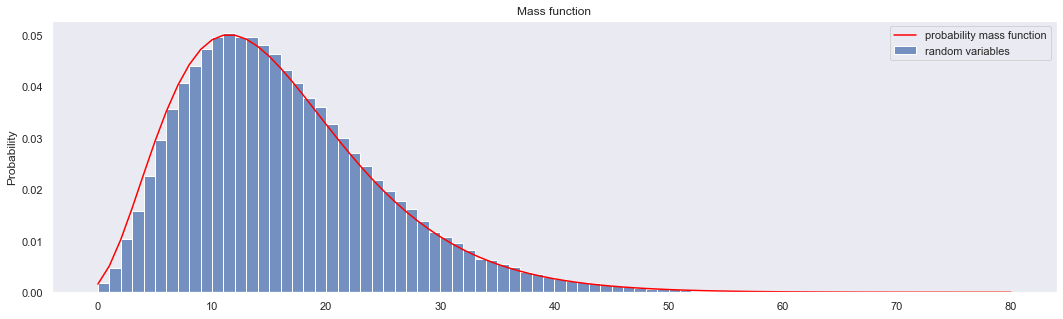

In [10]:
%matplotlib inline

from scipy.stats import nbinom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 成功確率 p = 0.20 の事象において n = 4 回成功するまでの失敗回数に関する負の二項分布に従った疑似乱数を size = 100000 だけ生成する.
n = 4
p = 0.20
size = 100000
rvs = nbinom.rvs(n=n, p=p, size=size)

print("=========================================")
print("負の二項分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = nbinom.mean(n=n, p=p)
var_true = nbinom.var(n=n, p=p)

print("")
print("=========================================")
print("負の二項分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("負の二項分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 1, 1)

# 図の定義
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)

# 確率質量関数による真値
y = nbinom.pmf(k=x, n=n, p=p)
ax1.plot(x, y, color="red", label="probability mass function")

ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース

- 購入頻度が負の二項分布に従う ([購買回数の分布と負の二項分布の関係](https://qiita.com/nijigen_plot/items/9570487b73ad01fff36b)).


## 2. 連続型の確率分布

### 例 2.1 (一様分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**一様分布** (uniform distribution) は $a < b$ とした時に以下の確率密度関数で表現される確率分布のことを指す.

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{1}{b-a} & (a \leq x \leq b) \\
            0             & (x < a, b < x)
        \end{cases}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する.  
　確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, 以下の計算から

$$
    \begin{align}
        \int_{- \infty}^{\infty}{f(x)dx} &= \int_{- \infty}^{a}{0 \cdot dx} + \int_{- \infty}^{\infty}{\frac{dx}{b-a}} + \int_{b}^{\infty}{0 \cdot dx} \\
                                         &= \biggl[ \frac{x}{b-a} \biggr]_{a}^{b} \\
                                         &= \frac{b}{b-a} - \frac{a}{b-a} = 1.
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{a + b}{2} \\
        & {\rm Var}(X) = \frac{(b-a)^2}{12}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{ a }^{ b }{ \frac{x}{b-a}dx } \\
                   &= \biggl[ \frac{x^2}{2(b-a)} \biggr]_{a}^{b} \\
                   &= \frac{1}{2(b-a)}(b^2 - a^2) \\
                   &= \frac{(b+a)(b-a)}{2(b-a)} = \frac{a + b}{2}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{ a }^{ b }{ \frac{x^2}{b-a}dx } \\
                   &= \biggl[ \frac{x^x}{3(b-a)} \biggr]_{a}^{b} \\
                   &= \frac{1}{x(b-a)}(b^3 - a^3) \\
                   &= \frac{(b^2 + ab + a^2)(b-a)()}{3(b-a)} = \frac{a^2 + ab + b^2}{3}
    \end{align}
$$

よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \frac{a^2 + ab + b^2}{3} - \frac{(a + b)^2}{4} \\
                     &= \frac{(b-a)^2}{12}
    \end{align}
$$


#### 関連Pythonモジュール

　[`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) を用いて生成する. [`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) では `loc`, `scale` のパラメータによって区間 `[loc, loc + scale]` の一様分布を生成する. この時, `loc` $ = a$, `scale` $ = b -a$ である.  
　また, [`numpy.random.Generator.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) を用いても生成できる. ただし擬似乱数生成器の機能しかない.


一様分布・擬似乱数
[ 9.95065512  6.49813316  7.68515292  6.44018504  4.89156344  4.46324227
  6.32769051 10.04815304  4.85728661  7.75358878  4.89624001  4.46252287
  5.01374982 10.89559954  7.2098469   6.61909724  8.23607335  7.83938134
  5.23790672  7.76578471  7.51763625 10.03306316 10.69633023  5.63304553
  6.85612567  3.34050016  7.09844287  7.84154807  6.68040171  5.37666393
  8.06861187  5.37056701  7.73186379  4.72960485  9.90314483  6.28297915
  9.95946764  3.58221712  6.53383242  3.37646909  5.05601151  3.47242238
  6.81961715  4.73973759  8.46290581  5.4986219   4.82042336  4.70064754
  9.83655385  4.92753148  3.13477314  3.1993617   4.11165284 10.61340077
 10.81796988  5.26187975  3.40482608  7.48412709  6.75338749  3.03543786
  5.78534164  6.02825652  5.93540719  8.37468458 10.64147265  3.6829674
  9.66665689  3.10204102  8.22110997  4.66456886  8.42479926  7.69269491
  8.16260313  8.53234849  3.59284219  8.41011392  3.36416211  8.8423773
 10.68205912  3.14284725  6.08907305  3.257

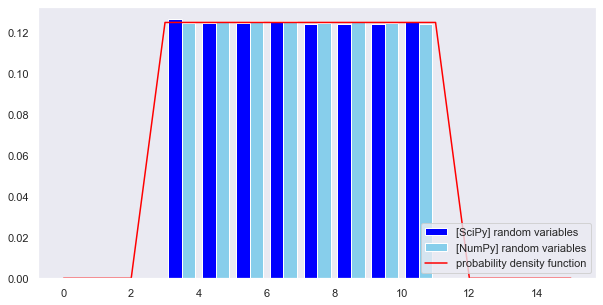

In [11]:
%matplotlib inline

from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# loc = 3, scale = 8 に関する一様分布に従った疑似乱数を size = 100000 だけ生成する (a = 3, b = 11).
loc = 3
scale = 8
size = 100000
rvs = uniform.rvs(loc=loc, scale=scale, size=size)

# numpy を使用した擬似乱数生成
low = loc
high = loc + scale
rng = np.random.default_rng()
rvs_numpy = rng.uniform(low=low, high=high, size=size)

print("=========================================")
print("一様分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = uniform.mean(loc=loc, scale=scale)
var_true = uniform.var(loc=loc, scale=scale)

print("")
print("=========================================")
print("一様分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("一様分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 5, 1)

# 図の定義
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
ax1.hist([rvs, rvs_numpy], bins=x, density=True, color=["blue", "skyblue"], label=["[SciPy] random variables", "[NumPy] random variables"])

# 確率質量関数による真値
y = uniform.pdf(x=x, loc=loc, scale=scale)
ax1.plot(x, y, color="red", label="probability density function")

# ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース

- 一様分布の擬似乱数をもとに他の分布の擬似乱数を生成
- モンテカルロシミュレーションの初期値として一様分布疑似乱数を使用


(normal-distribution)=
### 例 2.2 (正規分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**正規分布** (normal distribution, ガウス分布 \<Gaussian distribution\>ともいう) はパラメータ $\mu \geq 0, \sigma \gt 0$ を用いて以下の確率密度関数をもつ分布. 後ほど証明するが, $\mu$ は期待値, $\sigma^2$ は分散となる. 

$$
    f(x) = \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する.  
　確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, $y = x - \mu$ とすると, $dy = dx$ で以下の計算のようになる.

$$
    \begin{align}
        \int_{- \infty}^{\infty}{f(x)dx} &= \frac{1}{\sqrt{2\pi} \sigma} \int_{- \infty}^{ \infty }{ \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) } dx} \\
                                         &= \frac{1}{\sqrt{2\pi} \sigma} \underline{ \int_{- \infty}^{ \infty }{ \exp{ \biggl( - \frac{ y^2 }{2 \sigma^2} \biggr) } dy} } \\
                                         &= \frac{1}{\sqrt{2\pi} \sigma} \cdot \sqrt{2\pi} \sigma \\
                                         &= 1.
    \end{align}
$$

上記の下線部分は以下の[ガウス積分](gaussian-integral)の結果を利用している.


#### 命題 2.2.1 (ガウス積分)


<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(gaussian-integral)=
$$
    \begin{align}
        I = \int_{- \infty}^{\infty}{ e^{-ax^2}dx } &= \sqrt{\frac{\pi}{a}} \quad (a > 0)
    \end{align}
$$

</div>

<u>証明</u>

これは以下の計算から分かる.

$$
    \begin{align}
        I^2 &= \int_{- \infty}^{\infty}{ e^{-ax^2}dx } \int_{- \infty}^{\infty}{ e^{-ay^2}dy } \\
            &= \int_{- \infty}^{\infty}{ \int_{- \infty}^{\infty}{ e^{ -a(x^2 + y^2) }dxdy } }
    \end{align}
$$

ここで $x = r\cos {\theta}$, $y = r\sin {\theta}$ と置換すると, ヤコビアンは $r$ より $dxdy = rdrd\theta$ で, $\theta: 0 \rightarrow 2\pi$, $r: 0 \rightarrow \infty$ より

$$
    \begin{align}
        I^2 &= \int_{ 0 }^{ \infty }{ \int_{ 0 }^{ 2\pi }{ e^{ -ar^2 }rdrd\theta } } \\
            &= 2 \pi \int_{ 0 }^{ \infty }{ e^{ -ar^2 }rdr  } \\
            &= 2 \pi \biggl[ \frac{e^{-ar^2}}{-2a} \biggr]_{0}^{\infty} = \frac{\pi}{a}
    \end{align}
$$

よって, 

$$
    \begin{align}
        I = \sqrt{\frac{\pi}{a}} \quad
    \end{align}
$$

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \mu \\
        & {\rm Var}(X) = \sigma^2
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{ -\infty }^{ \infty }{ x \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }dx } \\
                   &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma} (\sigma y + \mu) \exp{ \biggl( - \frac{ y^2 }{2} \biggr) } \sigma dy } \quad (x-\mu=\sigma y) \\
                   &= \frac{\sigma}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ y \exp{\biggl( -\frac{y^2}{2} \biggr)} dy } + \frac{\mu}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{\biggl( -\frac{y^2}{2} \biggr)} dy } \\
                   &= \frac{\mu}{\sqrt{2 \pi}} \cdot \sqrt{2 \pi} = \mu
    \end{align}
$$

と求められる. 第 1 項は奇関数のため 0 となる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{ -\infty }^{ \infty }{ x^2 \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }dx } \\
                     &= \frac{\sigma}{\sqrt{2 \pi} \sigma} \int_{ -\infty }^{ \infty }{ (\sigma y + \mu)^2 \exp{ \biggl( - \frac{y^2}{2} \biggr) }\sigma dy } \quad (x-\mu=\sigma y) \\
                     &= \frac{1}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ (\sigma^2 y^2 + 2 \sigma \mu y +  \mu^2) \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ y^2 \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } + \frac{\mu^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \quad (\text{奇関数については0}) \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} \biggl\{ \biggl[ -yr^{\frac{-y^2}{2}}\biggr]_{-\infty}^{\infty} + \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \biggr\} + \frac{\mu^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \quad (\text{第1項は部分積分}) \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} (0 + \sqrt{2 \pi}) + \frac{\mu^2}{\sqrt{2 \pi}} \cdot \sqrt{2 \pi} = \sigma^2 + \mu^2
    \end{align}
$$

よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \sigma^2 + \mu^2 - \mu^2 \\
                     &= \sigma^2
    \end{align}
$$


#### 関連Pythonモジュール

　[`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) を用いて生成する.  
　また, [`numpy.random.Generator.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) を用いても生成できる. ただし擬似乱数生成器の機能しかない.


正規分布・擬似乱数
[ 8.52432291 11.18604672 10.93026812 10.48388263  8.50666357 11.69789225
 12.22680988 10.8029566   8.57399401  8.08640617 15.85768921 10.09683162
 11.15917967 13.33517135  9.92720679 11.20385501  9.77216305 11.47165924
 15.15221008  8.96859431  9.57802678  9.91454242 10.1840107  12.22317572
 10.3571056   6.67185227  9.65537319  7.56087489  6.75179813 11.5464493
  7.67711436 10.19913441 11.66578403 11.73806474 11.5578451  11.11489058
  8.21109545  5.53997255 11.42222609  8.21596144 11.63582202 11.2938368
  5.64247411 11.88785734 10.46772369  9.69514741 12.0394441  11.1483408
 11.09643666 11.76462401  8.81784898  7.38313185  9.3887632   5.4781994
 10.34234273  6.63793771  8.8504272   9.47458223 12.6327981  10.95263761
  7.32274152 10.68468876 10.16554401 12.70036991 11.2093694  10.074052
 11.66356431  9.15601016  9.85853301 10.40828189 10.12187743 10.49309865
  8.761231    8.66606476 11.89475823  9.47637695 10.30357235  9.79539862
  9.38233764 10.18309708  8.04538081  8.9196160

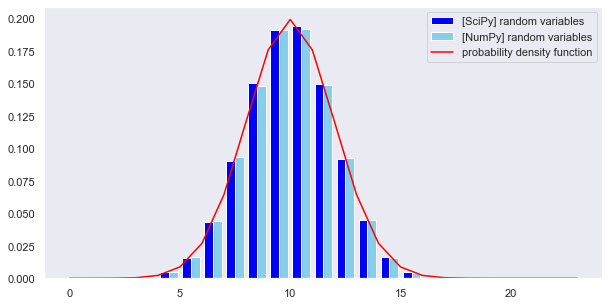

In [12]:
%matplotlib inline

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# loc = 10, scale = 2 に関する正規分布に従った疑似乱数を size = 100000 だけ生成する.
loc = 10
scale = 2
size = 100000
rvs = norm.rvs(loc=loc, scale=scale, size=size)

# numpy を使用した擬似乱数生成
rng = np.random.default_rng()
rvs_numpy = rng.normal(loc=loc, scale=scale, size=size)

print("=========================================")
print("正規分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = norm.mean(loc=loc, scale=scale)
var_true = norm.var(loc=loc, scale=scale)

print("")
print("=========================================")
print("正規分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("正規分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs + 5, 1)

# 図の定義
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
ax1.hist([rvs, rvs_numpy], bins=x, density=True, color=["blue", "skyblue"], label=["[SciPy] random variables", "[NumPy] random variables"])

# 確率質量関数による真値
y = norm.pdf(x=x, loc=loc, scale=scale)
ax1.plot(x, y, color="red", label="probability density function")

# ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース

- 工事中


#### 定理 2.2.2 (中心極限定理)

　**中心極限定理** (central limit theorem) とは, いかなる確率分布でもその母集団から取り出した標本の平均値の分布は, 平均を計算する回数が大きくなるにつれて正規分布に近づくという定理. これを数学的に表現すると以下のように書ける.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　平均 $\mu$, 分散 $\sigma^2$ の独立同分布の確率変数 $X_1, X_2, \cdots$ に対して, $\overline{X}(n) = \frac{1}{n} \sum_{i=1}^{n}{X_i}$ とおくと以下が成立する.

$$
    \lim_{n \rightarrow \infty} {P \biggl(a \leq \frac{\overline{X}(n) - \mu}{\sigma / \sqrt{n}} \leq b \biggr)} = \int_{a}^{b}{ \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}} dx }
$$

</div>

<u>証明</u>

$Y(n)$ を以下のように定義する.

$$
    Y(n) = \frac{\overline{X}(n) - \mu}{\sigma / \sqrt{n}}
$$

この時, $Y(n)$ の積率母関数が $N(0,1)$ の積率母関数に収束することを示せばよい.

$$
    \begin{align}
        Y(n) &= \frac{n\overline{X}(n) - n\mu}{\sigma \sqrt{n}} \\
             &= \frac{ \sum_{i=1}^{n}{X_i} - \sum_{i=1}^{n}{\mu} }{\sigma \sqrt{n}} \\
             &= \frac{1}{\sqrt{n}} \sum_{i=1}^{n}{ \frac{ X_i - \mu }{\sigma} }
    \end{align}
$$

となるので, ここで確率変数 $Z_i = \dfrac{X_i - \mu}{\sigma}$ を導入すると, $Z_i$ は次の性質を示す.

$$
    Y(n) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n}{ Z_i } \quad {\rm E}(Z_i) = 0, \quad {\rm Var}(Z_i) = 1
$$

$Y(n)$ の積率母関数 $M_{Y(n)}(t)$ は,

$$
    \begin{align}
        M_{Y(n)}(t) &= {\rm E}( \exp{ [ tY(n) ] } ) \\
                    &= {\rm E}\biggl( \exp{ \biggl[ \frac{t}{\sqrt{n}} \sum_{i=1}^{n}{ Z_i } \biggr] } \biggr) \\
                    &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \times e^{\frac{t}{n}\sqrt{Z_2}} \times \cdots \times e^{\frac{t}{n}\sqrt{Z_n}} \bigr)
    \end{align}
$$

$X_1, X_2, \cdots$ は互いに独立であり, その確率変数から定義された $Z_1, Z_2, \cdots$ も互いに独立である. ゆえに上式は

$$
    \begin{align}
        M_{Y(n)}(t) &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \times e^{\frac{t}{n}\sqrt{Z_2}} \times \cdots \times e^{\frac{t}{n}\sqrt{Z_n}} \bigr) \\
                    &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \bigr) \times {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_2}} \bigr) \times \cdots \times {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_n}} \bigr)
    \end{align}
$$

となる. また, $X_1, X_2, \cdots$ は同じ確率分布であり, その確率変数から定義された $Z_1, Z_2, \cdots$ も同じ確率分布なので上式はさらに

$$
    \begin{align}
        M_{Y(n)}(t) &= \Bigl( {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \bigr) \Bigr)^n \\
                    &= \biggl( M_{Z_1} \biggl( \frac{t}{\sqrt{n}} \biggr) \biggr)^n \label{☆}\tag{☆}
    \end{align}
$$

となり, $Z$ の積率母関数の冪乗で表現できる. $M_{Z_1}(t)$ に対してマクローリン展開を適応する.

$$
    M_{Z_1}(t) = M_{Z_1}(0) + \left.\frac{dM_{Z_1}(t)}{dt}\right|_{t=0} t + \left.\frac{1}{2}\frac{d^2M_{Z_1}(t)}{dt^2}\right|_{t=0} t^2 + O(t^3)
$$

ここで, 

$$
    M_{Z_1}(0) = 1, \quad
    \left.\frac{dM_{Z_1}(t)}{dt}\right|_{t=0} = \mu_1 = {\rm E}(Z_1) = 0, \quad
    \left.\frac{1}{2}\frac{d^2M_{Z_1}(t)}{dt^2}\right|_{t=0} = \mu_2 = {\rm E}(X^2) = 1
$$

より $M_{Z_1}(t) = 1 + \dfrac{t^2}{2} + O(t^3)$ である. よって

$$
    M_{Z_1} \biggl( \frac{t}{\sqrt{n}} \biggr) = 1 + \frac{t^2}{2n} + O \biggl( \biggl( \frac{t}{\sqrt{n}} \biggr)^3 \biggr)
$$

なので, 式 $(\ref{☆})$ に代入すれば

$$
    M_{Y_(n)} (t) = \biggl( 1 + \frac{t^2}{2n} + O \biggl( \biggl( \frac{t}{\sqrt{n}} \biggr)^3 \biggr) \biggr)^n.
$$

よって

$$
    \lim_{n \rightarrow \infty}{M_{Y_(n)} (t)} = \lim_{n \rightarrow \infty}{ \biggl( 1 + \frac{t^2}{2n}  \biggr)^n } = e^{\frac{1}{2}t^2}
$$

これは $N(0,1)$ の積率母関数と一致する.

　python で中心極限定理を確認してみる.

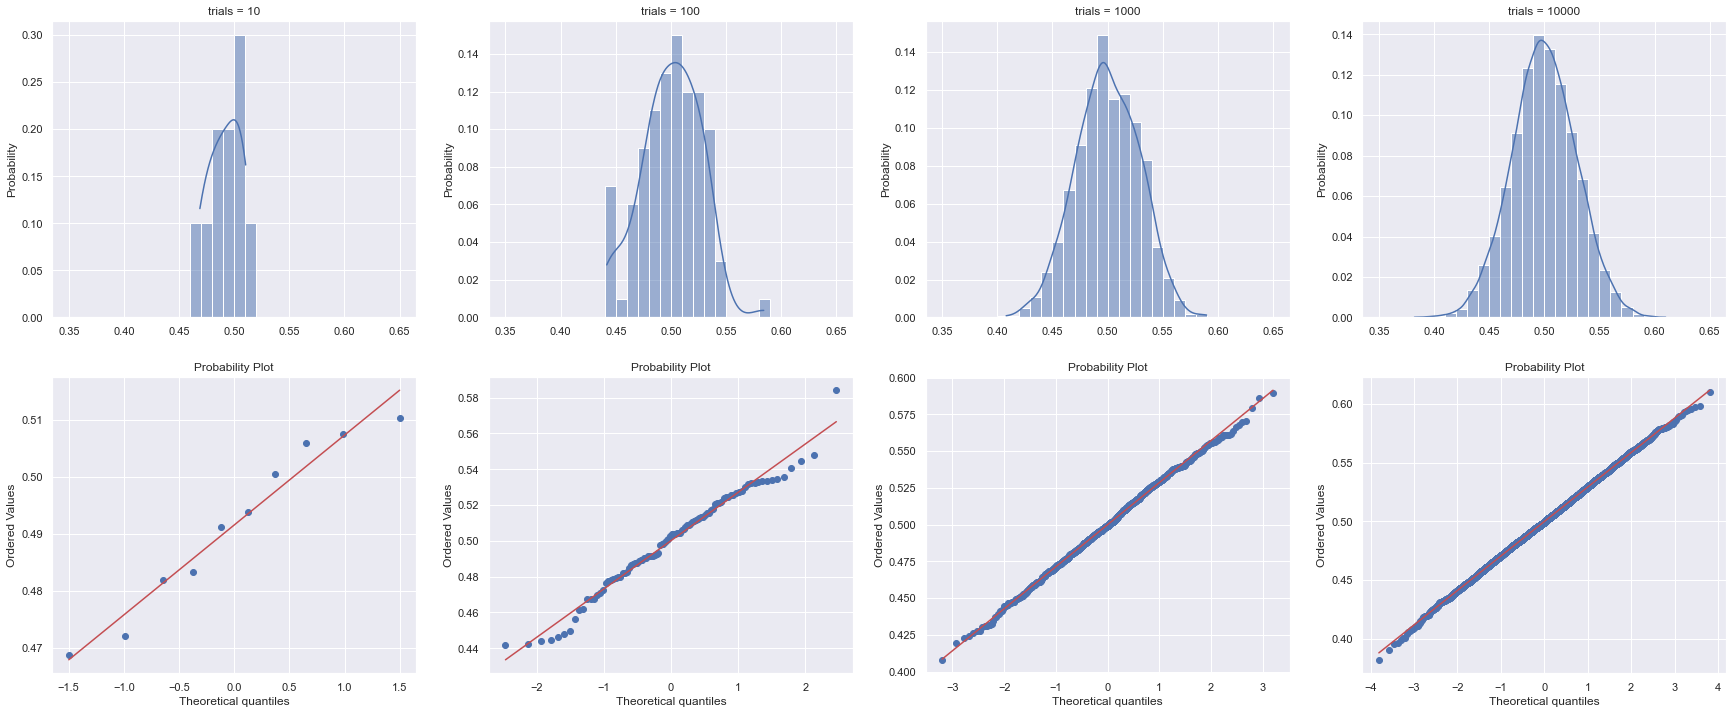

In [13]:
%matplotlib inline

from scipy import stats
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# ----------------------------------------------------------------------------------
# 一様分布に従う標本平均のサイズ数を増やすことで, 標本平均が正規分布に従うことの確認
# 
# ** 1回の試行においてサンプル数を size で定義
# ** 標本平均のサイズ数については trials_list で徐々に増加
# ----------------------------------------------------------------------------------
# 図の定義
fig = plt.figure(figsize=(30, 12))

# x軸の定義
x = np.arange(0.35, 0.65, 0.01)

# 擬似乱数生成
size = 100
trials_list = [10, 100, 1000, 10000]
rng = np.random.default_rng()
j = 1
for trials in trials_list:
    means = np.zeros(trials)
    for i in range(trials):
        rvs = rng.uniform(size=size)
        means[i] = rvs.mean()
    
    # 一様分布から抽出したサンプル平均を trials 回だけドローしたもののヒストグラム.
    ax1 = fig.add_subplot(2, 4, j)
    sns.histplot(means, bins=x, stat="probability", kde=True, label="random variables", ax=ax1)
    title = f"trials = {trials}"
    ax1.set_title(title)
    
    # 正規性を確認するための Q-Q プロット.
    ax1 = fig.add_subplot(2, 4, j+4)
    stats.probplot(means, plot=plt)
    
    j += 1

### 例 2.3 (対数正規分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$\log{X} \sim N(\mu, \sigma^2)$ の時に元の $X (>0)$ は**対数正規分布** (log-normal distribution) に従うといい, 確率密度関数は以下のように表現できる.

$$
    \begin{align}
        f(x) = \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) }
    \end{align}
$$

</div>

　これは [例 4.2 (正規分布と対数正規分布)](exmaple-normal-lognormal) でも説明したように, $y = \log(x)$ として $y \sim N(\mu, \sigma^2)$ の場合に上式の密度関数が得られる.  
　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, $y = \log{x} \Leftrightarrow x = e^y$ として,

$$
    \begin{align}
        \int_{ 0 }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma x} \exp{ \biggl( - \frac{( \log{x} -\mu)^2}{2 \sigma^2} \biggr) } dx} 
            &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma e^y} \exp{ \biggl( - \frac{( y -\mu)^2}{2 \sigma^2} \biggr) } e^y dy} \\
            &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{( y -\mu)^2}{2 \sigma^2} \biggr) } dy}
    \end{align}
$$

となり正規分布と同じ式なので 1 となる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) } \\
        & {\rm Var}(X) = \exp{ ( 2\mu + 2\sigma^2) } - \exp{ ( 2\mu + \sigma^2) }
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と $y = \log{x} \Leftrightarrow x = e^y$ で $dx = e^y dy$ より

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{ x \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) } dx } \\
                   &= \int_{-\infty}^{\infty}{ e^y \frac{1}{\sqrt{2 \pi} \sigma e^y} \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } \biggr) } e^y dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + y \biggr) } dy }
    \end{align}
$$

$\exp$ の中身を平方完成すると以下のようになる.

$$
    - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + y = - \frac{(y - \mu - \sigma^2)^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2}
$$

ここで, $t = y - \mu - \sigma^2$ と置換して

$$
    \begin{align}
        {\rm E}(X) &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - \sigma^2)^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2} \biggr) } dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ t^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2} \biggr) } dy } \\
                   &= \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) } \underline{\int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ t^2 }{2 \sigma^2} \biggr) } dt }} \\
                   &= \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) }
    \end{align}
$$

と求められる. 下線部分は [ガウス積分](gaussian-integral) によって計算できる.
 また分散については[分散と期待値の関係式](expect-variance)より

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2
    \end{align}
$$

なので ${\rm}E(X^2)$ を求める.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{ x^2 \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) } dx } \\
                   &= \int_{-\infty}^{\infty}{ e^{2y} \frac{1}{\sqrt{2 \pi} \sigma e^y} \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } \biggr) } e^y dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + 2y \biggr) } dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - 2 \sigma^2)^2 }{2 \sigma^2} + 2 (\mu + \sigma^2) \biggr) } dy } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) } \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - 2 \sigma^2)^2 }{2 \sigma^2} \biggr) } dy } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) } \underline{ \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{t^2 }{2 \sigma^2} \biggr) } dt } \quad (t = y - \mu - 2\sigma^2) } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) }
    \end{align}
$$

である. 下線部分は [ガウス積分](gaussian-integral) によって計算できる.
よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \exp{ ( 2\mu + 2\sigma^2) } - \exp{ ( 2\mu + \sigma^2) }.
    \end{align}
$$

#### 関連Pythonモジュール

　　[`scipy.stats.lognorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm) を用いて生成する.  
　また, [`numpy.random.Generator.lognormal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html) を用いても生成できる. ただし擬似乱数生成器の機能しかない.

対数正規分布・擬似乱数
[ 4.51604874  3.62479492  9.15891162 13.5965129  21.94641852  8.00623264
  3.43929397  3.32784162  9.71489498  3.5795588   5.21589024  8.85859552
  5.0180183   3.87489561  7.15985025  6.34664561 25.8038001   3.16065991
 10.58483667  4.22285878 11.74472401  5.8182768   2.48418055  3.62869172
 13.49819193  3.61425213  5.17196568  7.83951484  7.13873145  6.83900631
 12.05867065 17.98157247 10.28695395  6.60748251 11.10963684  4.38281418
  3.22111951 14.53229684  8.55101104  2.41006703  2.82897151 13.393126
  6.1551381  20.52481629 33.85056718 10.16991823  3.60756571 14.33604439
  4.43351904 14.42895683 16.79719153  3.32629213  8.28061346  6.38144147
 19.87837971  2.72223255  4.24755707 18.33406012  6.79281082  4.12354844
 10.92527741  8.45126522  5.46487294 10.43282048  5.57713854  6.52402313
  4.98637688 12.94196351  4.81919796 38.4987008  12.84181394  8.87347157
 16.22923782  5.39773286  3.14117886  6.13213746  2.44721656 18.29417073
  5.06027306  6.35655013  3.25199765  2.9

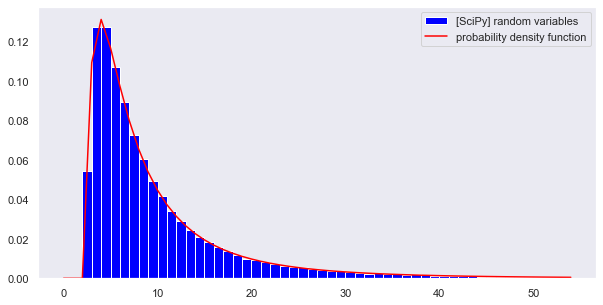

In [5]:
%matplotlib inline

from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# log(X) が loc = 2, scale = 5 に関する正規分布に従った対数正規分布の疑似乱数を size = 100000 だけ生成する.
s = 1
loc = 2
scale = 5
size = 100000
rvs = lognorm.rvs(s=s, loc=loc, scale=scale, size=size)

# numpy を使用した擬似乱数生成
rng = np.random.default_rng()
rvs_numpy = rng.lognormal(mean=loc, sigma=scale, size=size)

print("=========================================")
print("対数正規分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = lognorm.mean(s=s, loc=loc, scale=scale)
var_true = lognorm.var(s=s, loc=loc, scale=scale)

print("")
print("=========================================")
print("対数分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("対数分布")
print("======================================")

# x軸
x = np.arange(0, 55, 1)

# 図の定義
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
ax1.hist(rvs, bins=x, density=True, color="blue", label="[SciPy] random variables")

# 確率質量関数による真値
y = lognorm.pdf(x=x, s=s, loc=loc, scale=scale)
ax1.plot(x, y, color="red", label="probability density function")

# ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

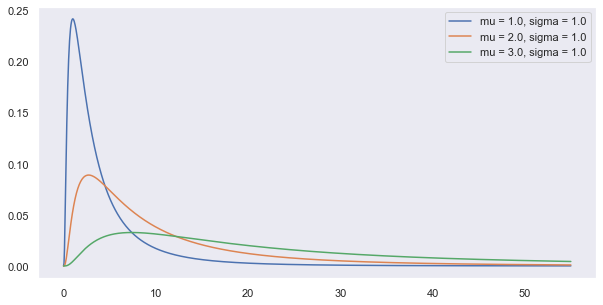

In [15]:
x = np.arange(0, 55, 0.05)

# 図の定義
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)


parameters = [
    [np.exp(1), 1.0],
    [np.exp(2), 1.0],
    [np.exp(3), 1.0],
]

for scale, s in parameters:
    # 確率質量関数による真値
    y = lognorm.pdf(x=x, s=s, scale=scale)
    label = f"mu = {round(np.log(scale), 1)}, sigma = {s}"
    ax1.plot(x, y, label=label)

# ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

#### ユースケース

- 世帯年収


### 例 2.4 (指数分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**指数分布** (exponential distribution) は $\lambda > 0$ として以下の確率密度関数で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \lambda e^{-\lambda x}  & (x \geq 0) \\
            0 & (x < 0)
        \end{cases}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, 

$$
    \begin{align}
        \int_{0}^{\infty}{\lambda e^{-\lambda x} dx} = \biggl[ -e^{-\lambda x} \biggr]_{0}^{\infty} = 1
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{1}{\lambda} \\
        & {\rm Var}(X) = \frac{1}{\lambda^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{x \lambda e^{-\lambda x} dx } \\
                   &= \biggl[ -xe^{-\lambda x} \biggr]_{0}^{\infty} + \int_{0}^{\infty}{e^{-\lambda x}dx} \\
                   &= \biggl[ -\frac{1}{\lambda} e^{-\lambda x} \biggr]_{0}^{\infty} \\
                   &= \frac{1}{\lambda}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい. 部分積分を 2 回行うことで計算できる.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{x^2 \lambda e^{-\lambda x} dx} \\
                     &= \biggl[ -x^2e^{-\lambda x} \biggr]_{0}^{\infty} - \frac{2}{\lambda} \biggl[ -xe^{-\lambda x} \biggr]_{0}^{\infty} + \frac{2}{\lambda} \int_{0}^{\infty}{e^{-\lambda x}dx} \\
                     &= \frac{2}{\lambda}\biggl[ -\frac{1}{\lambda} e^{-\lambda x} \biggr]_{0}^{\infty} \\
                     &= \frac{2}{\lambda^2}
    \end{align}
$$


よって

$$
    \begin{align}
        {\rm Var}(X) = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}.
    \end{align}
$$

#### 関連Pythonモジュール

　[`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) を用いて生成する.  
　また, [`numpy.random.Generator.exponential`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html) を用いても生成できる. ただし擬似乱数生成器の機能しかない. いずれにおいても `scale = 1 / lambda` という関係になっていることに注意.

指数分布・擬似乱数
[0.07370654 0.30736603 0.19954808 0.11360876 0.07173447 0.07220122
 0.09482631 0.04509634 0.03992094 0.04255646 0.00845164 0.20863935
 0.38642806 0.07887644 0.01009299 0.01036269 0.23254007 0.14825816
 0.13430526 0.06858659 0.01173542 0.05174213 0.05679711 0.10123393
 0.25291761 0.22698255 0.04674577 0.07596912 0.031338   0.06677979
 0.01571296 0.05042136 0.29025925 0.18825697 0.01194125 0.00174347
 0.19410898 0.01046316 0.01202204 0.13071102 0.08133563 0.11040071
 0.05839104 0.05501627 0.01428452 0.01430032 0.02868289 0.08707259
 0.11442783 0.00998695 0.05064915 0.12659075 0.06918623 0.0573619
 0.06772698 0.0027412  0.02867719 0.00502019 0.12310379 0.0351919
 0.01910275 0.21214309 0.01089133 0.00095497 0.04337098 0.14136863
 0.29305851 0.00908271 0.01366843 0.04449046 0.00670723 0.01584628
 0.02411949 0.02735016 0.02448264 0.09792772 0.16522076 0.34314946
 0.11533613 0.0500577  0.03961539 0.02754275 0.18101273 0.04447901
 0.15570095 0.06082735 0.08416347 0.04651815 0.0052548

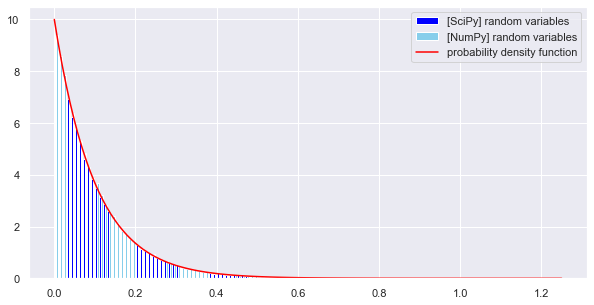

In [15]:
%matplotlib inline

from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# lambda = 10 (scale = 1/10) に関する指数分布に従った疑似乱数を size = 100000 だけ生成する.
scale = 1 / 10
size = 100000
rvs = expon.rvs(scale=scale, size=size)

# numpy を使用した擬似乱数生成
rng = np.random.default_rng()
rvs_numpy = rng.exponential(scale=scale, size=size)

print("=========================================")
print("指数分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = expon.mean(scale=scale)
var_true = expon.var(scale=scale)

print("")
print("=========================================")
print("指数分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("指数分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs, 0.01)

# 図の定義
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
ax1.hist([rvs, rvs_numpy], bins=x, density=True, color=["blue", "skyblue"], label=["[SciPy] random variables", "[NumPy] random variables"])

# 確率質量関数による真値
y = expon.pdf(x=x, scale=scale)
ax1.plot(x, y, color="red", label="probability density function")
ax1.legend()

#### ユースケース

- 工事中


### 例 2.5 (ガンマ分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ガンマ分布** (Gamma distribution) は $\lambda > 0, \alpha > 0$ として以下の確率密度関数で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x}  & (x \geq 0) \\
            0 & (x < 0)
        \end{cases}
    \end{align}
$$

ここで $\varGamma(\alpha)$ は以下で定義され**ガンマ関数** という.

$$
    \begin{align}
        \varGamma(\alpha) = \int_{0}^{\infty}{x^{\alpha - 1}e^{-x}dx}
    \end{align}
$$

</div>

　$\alpha = 1$ ならば指数分布になることが分かる.  
　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また合計和が 1 になることは以下についてまず示す.

$$
    \begin{align}
        \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} = \frac{\varGamma(\alpha)}{\lambda^(\alpha)}
    \end{align}
$$

$\lambda x = y$ とすれば $\lambda dx = dy$ より

$$
    \begin{align}
        \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} &= \int_{0}^{\infty}{ \biggl( \frac{y}{\lambda} \biggr) ^{\alpha - 1} e^{-y} \frac{1}{\lambda} dy } \\
                                                        &= \frac{1}{\lambda^\alpha} \int_{0}^{\infty}{y^{\alpha-1}e^{-y}dy} \\
                                                        &= \frac{\varGamma(\alpha)}{\lambda^(\alpha)}
    \end{align}
$$

ゆえに以下のように計算できる.

$$
    \begin{align}
        \int_{0}^{\infty}{ \frac{ \lambda^\alpha }{ \varGamma(\alpha) } x^{\alpha - 1} e^{-\lambda x} dx } 
            &= \frac{\lambda^{\alpha}}{\varGamma(\alpha)} \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} \\
            &= \frac{\lambda^{\alpha}}{\varGamma(\alpha)} \cdot \frac{\varGamma(\alpha)}{\lambda^(\alpha)} \\
            &= 1.
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{\alpha}{\lambda} \\
        & {\rm Var}(X) = \frac{\alpha}{\lambda^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と[ガンマ関数の性質](gamma-function)から $\varGamma(\alpha + 1) = \alpha \varGamma(\alpha)$ となることに注意して

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{ x \frac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x} dx } \\
                   &= \int_{0}^{\infty}{ \frac{\alpha \lambda^\alpha}{\varGamma(\alpha + 1)} x^{\alpha}e^{-\lambda x} dx } \\
                   &= \frac{\alpha}{\lambda} \int_{0}^{\infty}{ \frac{\lambda^{\alpha + 1}}{\varGamma(\alpha + 1)} x^{(\alpha+1)-1}e^{-\lambda x} dx } \\
                   &= \frac{\alpha}{\lambda}
    \end{align}
$$

と求められる. た分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい. [ガンマ関数の性質](gamma-function)から $\varGamma(\alpha + 2) = (\alpha + 1)\varGamma(\alpha + 1) = (\alpha + 1)\alpha \varGamma(\alpha)$ であることより

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{ x^2 \frac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x} dx } \\
                     &= \int_{0}^{\infty}{ \frac{\alpha (\alpha + 1) \lambda^\alpha}{\varGamma(\alpha + 2)} x^{\alpha + 1}e^{-\lambda x} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{\lambda^2} \int_{0}^{\infty}{ \frac{\lambda^{\alpha + 2}}{\varGamma(\alpha + 2)} x^{(\alpha+2)-1}e^{-\lambda x} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{\lambda^2}
    \end{align}
$$


よって

$$
    \begin{align}
        {\rm Var}(X) = \frac{\alpha(\alpha + 1)}{\lambda^2} - \frac{\alpha^2}{\lambda^2} = \frac{\alpha}{\lambda^2}.
    \end{align}
$$

#### 命題 2.5.1 (ガンマ関数の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(gamma-function)=
$$
    \begin{align}
        & \varGamma(\alpha) = (\alpha - 1)\varGamma(\alpha) \\
        & \varGamma(n + 1) = n! \quad (n \text{は正整数とする}) \\
        & \varGamma \biggl( \frac{1}{2} \biggr) = \sqrt{\pi}
    \end{align}
$$

</div>

<u>証明</u>
　一つ目について部分積分より

$$
    \begin{align}
        \varGamma(\alpha) &= \int_{0}^{\infty}{x^{\alpha-1}e^{-x}dx} \\
                          &= \biggl[ -x^{\alpha-1}e^{-x} \biggr]_{0}^{\infty} + (\alpha - 1) \int_{0}^{\infty}{x^{\alpha-2}x^{-2}dx} \\
                          &= (\alpha - 1) \varGamma(\alpha - 1)
    \end{align}
$$

と求められる. また $\varGamma(1)$ について

$$
    \begin{align}
        \varGamma(1) &= \int_{0}^{\infty}{e^{-x}dx} \\
                     &= \biggl[ -e^{-x} \biggr]_{0}^{\infty} \\
                     &= 1
    \end{align}
$$

なので, $n \in \mathbb{N}$ として

$$
    \begin{align}
        \varGamma(n + 1) &= n \varGamma(n) \\
                         &= n(n-1) \varGamma(n-1) \\
                         &\cdots \\
                         &= n(n-1) \cdots 1 \varGamma(1) \\
                         &= n!
    \end{align}
$$

と分かる. 最後に[ガウス積分](gaussian-integral)を用いて以下のように計算できる.

$$
    \begin{align}
        \varGamma\biggl(\frac{1}{2}\biggr) &= \int_{0}^{\infty}{x^{-\frac{1}{2}}e^{-x}dx} \\
                                           &= \int_{0}^{\infty}{ \frac{e^{-x}}{\sqrt{x}}dx} \\
                                           &= \int_{0}^{\infty}{ \frac{e^{-t^2}}{t}2tdt} \quad (t = \sqrt{x}) \\
                                           &= 2 \int_{0}^{\infty}{e^{-t^2}dt} \\
                                           &= \sqrt{\pi}
    \end{align}
$$

#### 関連Pythonモジュール

- [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma) 
    - 引数
        - `a`: $\alpha$ に相当.
        - `scale`: $\dfrac{1}{\lambda}$ に相当.

<br>

- [`numpy.random.Generator.gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html)
    - 引数
        - `shape`: $\alpha$ に相当.
        - `scale`: $\dfrac{1}{\lambda}$ に相当.

ガンマ分布・擬似乱数
[3.94460961 2.33355246 0.74071559 1.47790916 2.72922754 1.81586045
 2.60613007 5.87967411 2.02009488 2.12774695 1.79975667 1.44637956
 1.12945852 1.46885278 0.70584925 2.42509529 0.62525083 3.7433015
 1.2508781  2.10082062 0.51022486 4.73914962 1.39614538 1.20308304
 2.41807484 1.20110778 4.47582237 1.57390508 0.92366599 3.84865093
 1.28880575 0.8753026  2.09398862 2.2809019  0.2773048  3.18175898
 2.99927417 0.31200956 3.3138798  1.1499385  1.3487843  2.35393788
 2.73119215 2.34870542 2.10437628 3.30829328 0.50833828 2.376555
 2.69205965 1.61399048 0.71260941 3.53528791 1.33249717 4.09551602
 0.42652973 1.68494098 0.35292303 2.47864772 1.9653399  0.59475186
 3.05563355 1.52526444 4.72123979 3.3405357  3.05995939 0.9150559
 2.82977585 3.15830286 2.00037709 1.80347716 1.45182777 1.69964277
 1.12669419 2.73980021 3.06436604 0.88579208 7.15246249 2.48008468
 0.28286829 1.56810911 1.85715201 0.99004267 1.64344534 1.07810517
 3.66190299 1.55153593 3.41165985 1.30567659 1.8999452 

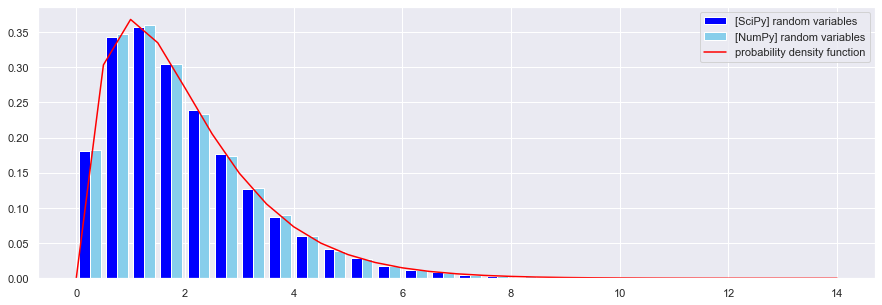

In [24]:
%matplotlib inline

from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# alpha = 2, lambda = 1 (scale = 1/1) に関する指数分布に従った疑似乱数を size = 100000 だけ生成する.
a = 2
scale = 1
size = 100000
rvs = gamma.rvs(a=a, scale=scale, size=size)

# numpy を使用した擬似乱数生成
rng = np.random.default_rng()
rvs_numpy = rng.gamma(shape=a, scale=scale, size=size)

print("=========================================")
print("ガンマ分布・擬似乱数")
print("=========================================")
print(rvs[0:100])

# 擬似乱数から期待値・分散の計算
exp_rvs = np.mean(rvs)
var_rvs = np.var(rvs)
max_rvs = np.max(rvs)
min_rvs = np.min(rvs)

# 期待値・分散の理論値
exp_true = gamma.mean(a, scale=scale)
var_true = gamma.var(a, scale=scale)

print("")
print("=========================================")
print("ガンマ分布・期待値/分散")
print("=========================================")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")
print(f"最大値 (乱数): {max_rvs}")
print(f"最小値 (乱数): {min_rvs}")

# 可視化
print("")
print("======================================")
print("ガンマ分布")
print("======================================")

# x軸
x = np.arange(0, max_rvs, 0.5)

# 図の定義
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)

# 乱数によるヒストグラム
ax1.hist([rvs, rvs_numpy], bins=x, density=True, color=["blue", "skyblue"], label=["[SciPy] random variables", "[NumPy] random variables"])

# 確率質量関数による真値
y = gamma.pdf(x, a, scale=scale)
ax1.plot(x, y, color="red", label="probability density function")


ax1.legend()

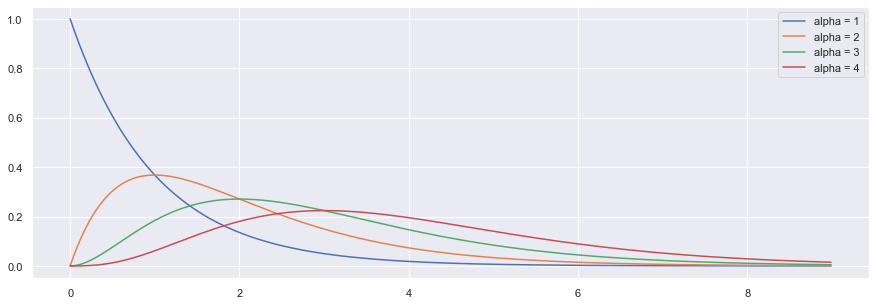

In [26]:
# 図の定義
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)

x = np.arange(0, 9, 0.01)

scale = 1
alphas = [1, 2, 3, 4]

for a in alphas:
    y = gamma.pdf(x, a, scale=scale)
    label = f"alpha = {a}"
    ax1.plot(x, y, label=label,)
    
ax1.legend()

#### ユースケース

- 工事中



### 例 2.6 (ベータ分布)


#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ベータ分布** (Beta distribution) は $(0, 1)$ 上の確率分布で $\alpha > 0, \beta > 0$ としたときに以下の確率分布で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)}  & (0 < x < 1) \\
            0 & (\text{Otherwise})
        \end{cases}
    \end{align}
$$

ここで $B(\alpha, \beta)$ は以下で定義され**ベータ関数**と呼ぶ.

$$
    \begin{align}
        B(\alpha, \beta) = \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また合計和が 1 になることについては

$$
    \int_{0}^{1}{ \frac{ x^{\alpha - 1}(1-x)^{\beta - 1} }{B(\alpha, \beta)} dx} = \frac{1}{B(\alpha, \beta)} \int_{0}^{1}{ x^{\alpha - 1}(1-x)^{\beta - 1} dx} = \frac{1}{B(\alpha, \beta)} \times B(\alpha, \beta) = 1
$$

から分かる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{\alpha}{\alpha + \beta} \\
        & {\rm Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と[ベータ関数の性質(4)](beta-function) から

$$
    B(\alpha, \beta) = \frac{\alpha + \beta}{\alpha}B(\alpha + 1, \beta)
$$

を利用して, 

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{1}{ x \frac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)} dx } \\
                   &= \int_{0}^{1}{ \frac{\alpha}{\alpha + \beta} \frac{x^{\alpha} (1-x)^{\beta - 1}}{ B(\alpha + 1, \beta)} dx } \\
                   &= \frac{\alpha}{\alpha + \beta}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から $E(X^2)$ を求めればよく, 期待値を求めるときと同じようにする. ただし[ベータ関数の性質(4)](beta-function) から

$$
    B(\alpha, \beta) = \frac{\alpha + \beta}{\alpha}B(\alpha + 1, \beta) = \frac{(\alpha + \beta)(\alpha + \beta + 1)}{(\alpha)(\alpha + 1)}B(\alpha + 2, \beta) 
$$

であることを注意して

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{1}{ x^2 \frac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)} dx } \\
                     &= \int_{0}^{1}{ \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)} \frac{x^{\alpha + 1} (1-x)^{\beta - 1}}{ B(\alpha + 2, \beta)} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)}
    \end{align}
$$

なので

$$
    \begin{align}
        {\rm Var}(X) = \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)} - \frac{\alpha^2}{(\alpha + \beta)^2} = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
    \end{align}
$$

#### 命題 2.6.1 (ベータ関数の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(beta-function)=
<u>ベータ関数の性質</u>

　$\alpha > 0, \beta > 0$ とする. 以下の 8 性質を満たす.

$$
    \begin{align}
        &\text{性質(1)} \quad \quad B(\alpha, \beta) = B(\beta, \alpha) \\
        &\text{性質(2)} \quad \quad \alpha B(\alpha, \beta + 1) = \beta B(\alpha + 1, \beta)  \\
        &\text{性質(3)} \quad \quad B(\alpha, \beta) = B(\alpha + 1, \beta) + B(\alpha, \beta + 1) \\
        &\text{性質(4)} \quad \quad (\alpha + \beta)B(\alpha + 1, \beta) = \alpha B(\alpha, \beta) \\
        &\text{性質(5)} \quad \quad (\alpha + \beta)B(\alpha, \beta + 1) = \beta B(\alpha, \beta) \\
        &\text{性質(6)} \quad \quad B(\alpha, \beta) = 2 \int_{0}^{\pi / 2}{\sin^{2\alpha -1}{\theta} \cos^{2\beta -1}{\theta} d\theta} \\
        &\text{性質(7)} \quad \quad B(\alpha, \beta) = \frac{1}{2^{x + y -1}} \int_{-1}^{1}{(1+t)^{\alpha -1} (1-t)^{\beta -1} dt} \\
        &\text{性質(8)} \quad \quad B(1, x) = (x, 1) = \frac{1}{x}
    \end{align}
$$

</div>

<u>証明</u>  
　性質(1) はベータ関数の定義において $y = 1 - x$ と置換積分すると

$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{1}^{0}{(1-y)^{\alpha-1}y^{\beta-1}(-dy)} \\
                         &= \int_{0}^{1}{(1-y)^{\alpha-1}y^{\beta-1}(dy)} \\
                         &= B(\beta, \alpha).
    \end{align}
$$

　性質(2)については部分積分を用いて

$$
    \begin{align}
        \alpha B(\alpha, \beta + 1) &= \alpha \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta}dx} \\
                                    &= \biggl[ x^{alpha}(1-x)^{\beta} \biggr]_{0}^{1} + \beta \int_{0}^{1}{x^{\alpha}(1-x)^{\beta-1}dx} \\
                                    &= \beta B(\alpha + 1, \beta).
    \end{align}
$$

　性質(3)については

$$
    \begin{align}
        B(\alpha, \beta + 1) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta}dx} \\
                             &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}(1-x)dx} \\
                             &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} - \int_{0}^{1}{x^{\alpha}(1-x)^{\beta-1}dx} \\
                             &= B(\alpha, \beta) - B(\alpha + 1, \beta).
    \end{align}
$$

よって

$$
    \begin{align}
        B(\alpha, \beta) = B(\alpha + 1, \beta) + B(\alpha, \beta + 1).
    \end{align}
$$

　性質(4)は性質(3)に対して性質(2)の $\alpha B(\alpha, \beta + 1) = \beta B(\alpha + 1, \beta)$ を適用して

$$
    \begin{align}
        B(\alpha, \beta) &= B(\alpha + 1, \beta) + B(\alpha, \beta + 1) \\
                         &= B(\alpha + 1, \beta) + \frac{\beta}{\alpha} B(\alpha + 1, \beta).
    \end{align}
$$

両辺を $\alpha$ でかけて, $(\alpha + \beta)B(\alpha + 1, \beta) = \alpha B(\alpha, \beta)$ となる. 性質(5)についても同様にすれば求められる.
　性質(6)について積分変数 $x$ について区間 $(0, 1)$ より $x = \sin^{2}{\theta}$ とおくことができ, この時, $x: 0 \rightarrow 1 \Rightarrow \theta: 0 \rightarrow \pi / 2$ となる. また $dx = 2\sin{\theta} \cos{\theta} d\theta$ から

$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{0}^{\pi / 2}{\sin^{2\alpha-2}{\theta} \cos^{2\beta-2}{\theta}(2\sin{\theta} \cos{\theta} d\theta)} \\
                         &= 2 \int_{0}^{\pi / 2}{\sin^{2\alpha -1}{\theta} \cos^{2\beta -1}{\theta} d\theta}
    \end{align}
$$

となる.  
　性質(7)は $t = 2x - 1$ と置換積分すると
 
$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{-1}^{1}{ \biggl( \frac{1+t}{2} \biggr)^{\alpha - 1} \biggl( \frac{1-t}{2} \biggr)^{\beta - 1} \frac{dt}{2} } \\
                         &= \frac{1}{2^{x + y -1}} \int_{-1}^{1}{(1+t)^{\alpha -1} (1-t)^{\beta -1} dt}.
    \end{align}
$$

　最後の性質(8)について, 性質(1)から $B(1,x) = B(x, 1)$ で

$$
    B(x, 1) = \int_{0}^{1}{t^{x - 1}dt} = \biggl[ \frac{t^x}{x} \biggr]_{0}^{1} = \frac{1}{x}
$$

となり, すべての性質の証明が完了した.

#### 関連Pythonモジュール

　工事中

#### ユースケース

- 工事中
